In [103]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

from timeit import default_timer as timer


In [163]:
#Inputs and Outputs
x = np.array([[1,0,0,0,0,0,0,0],
              [0,1,0,0,0,0,0,0],
              [0,0,1,0,0,0,0,0],
              [0,0,0,1,0,0,0,0],
              [0,0,0,0,1,0,0,0],
              [0,0,0,0,0,1,0,0],
              [0,0,0,0,0,0,1,0],
              [0,0,0,0,0,0,0,1]])

y = np.array([[1,0,0,0,0,0,0,0],
              [0,1,0,0,0,0,0,0],
              [0,0,1,0,0,0,0,0],
              [0,0,0,1,0,0,0,0],
              [0,0,0,0,1,0,0,0],
              [0,0,0,0,0,1,0,0],
              [0,0,0,0,0,0,1,0],
              [0,0,0,0,0,0,0,1]])

[[0.1 0.1 0.1 0.1 0.1 0.1 0.1 0.1]]
Cost:2.2953856022686514
Cost:0.00015378125586866208
Cost:7.5026500204574e-05
Cost:4.955594547708496e-05
Cost:3.697542167436806e-05
[[-25.39463097 -14.00643738  -0.81626741   8.26347999 -14.92200065
  -15.8963672   -4.75729514  -7.62070777]]


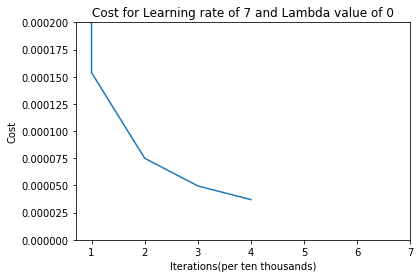

Output after training for Learning rate of 7 and Lambda = 0
[[0.996 0.001 0.    0.    0.002 0.002 0.    0.   ]
 [0.003 0.997 0.    0.    0.    0.    0.002 0.002]
 [0.    0.    0.996 0.002 0.003 0.003 0.    0.   ]
 [0.    0.    0.003 0.996 0.    0.    0.002 0.002]
 [0.003 0.    0.002 0.    0.997 0.    0.002 0.   ]
 [0.003 0.    0.002 0.    0.    0.996 0.    0.002]
 [0.    0.003 0.    0.002 0.002 0.    0.997 0.   ]
 [0.    0.002 0.    0.002 0.    0.002 0.    0.997]]
Input Layer weights after training for Learning rate of 7 and Lambda = 0
[[ 7.69214876  6.25702524  5.31402924]
 [ 4.26762537 -6.06414521  5.27488522]
 [-6.65024397  0.16197225 -5.61988582]
 [-1.37270104 -7.4313183  -2.4306769 ]
 [-5.51951774  6.54161298  2.70089966]
 [ 1.42388344  5.36839156 -6.13861293]
 [-5.4985233  -2.30803123  5.64875753]
 [ 5.74258293 -1.88137791 -4.46725531]]
Hidden Layer weights after training for Learning rate of 7 and Lambda = 0
[[ 10.88614787  10.3087556  -19.8908692   -9.99388083 -12.51727791
    

In [172]:
#define sigmoid function
def sigmoid(x, deriv=False):
    if (deriv == True):
        return(x*(1-x))
    
    return 1/(1+np.exp(-x))

#seed

np.random.seed(1)

#synapses and biases, initializing as small random numbers
W0 = 0.1*np.random.random((8,3)) 
b0 = 0.1*np.ones(3).reshape(1,3)
W1 = 0.1*np.random.random((3,8)) 
b1 = 0.1*np.ones(8).reshape(1,8)

print(b1)

#training (60000 time steps)



start = timer()
costs = []
#Number of timesteps
for j in range(50000):

    #layers
    layer0 = x
    layer1 = sigmoid(np.dot(layer0,W0)+b0)
    layer2 = sigmoid(np.dot(layer1,W1)+b1)
    
    #Size of training set
    m = x.shape[0]
    
    #Regularization Parameter
    lamda = 0
    
    #Backpropagation
    l2_error = y - layer2
    cost = (1/m)*(np.sum(np.abs(l2_error)**2)) + (1/m)*0.5*lamda*(np.sum(np.square(W0))+np.sum(np.square(W1)))
    if(j % 10000) == 0:
        print('Cost:' + str(cost))
        costs.append(cost)
        
    #calculate deltas  
    l2_delta = -l2_error*sigmoid(layer2,deriv=True) # ie. -(yi-ai).f'(zi)
    
    l1_error = l2_delta.dot(W1.T)
    
    l1_delta = l1_error*sigmoid(layer1,deriv=True)
    
    alpha = 7
    #Update synapses(weights) and biases using gradient descent
    W1 += -(layer1.T.dot(l2_delta)+lamda*W1)*alpha
    #W1 += -((1/m)*layer1.T.dot(l2_delta)+lamda*W1)*alpha || 1/m factor was found to slow convergence
    b1 += -np.ones(8).reshape(1,8).dot(l2_delta)*alpha
    #b1 += -(1/m)*np.ones(8).reshape(1,8).dot(l2_delta)*alpha
    W0 += -(layer0.T.dot(l1_delta)+lamda*W0)*alpha
    #W0 += -((1/m)*layer0.T.dot(l1_delta)+lamda*W0)*alpha
    b0 += -np.ones(8).reshape(1,8).dot(l1_delta)*alpha
    #b0 += -(1/m)*np.ones(8).reshape(1,8).dot(l1_delta)*alpha


print(b1)

[[-2.22906014  1.68697159 -2.68283793 -2.22906014 -2.22906014 -2.22906014
  -2.75963652 -2.22906014]]

plt.plot(costs)
plt.xlabel('Iterations(per ten thousands)')
plt.ylabel('Cost')
plt.xlim((0.7,7))
plt.ylim((0,0.0002))
plt.title('Cost for Learning rate of '+str(alpha)+' and Lambda value of '+str(lamda))
plt.show()

      
print('Output after training for Learning rate of '+str(alpha)+' and Lambda = '+str(lamda))
print(np.round(layer2,3))

print('Input Layer weights after training for Learning rate of '+str(alpha)+' and Lambda = '+str(lamda))
print(W0)

print('Hidden Layer weights after training for Learning rate of '+str(alpha)+' and Lambda = '+str(lamda))
print(W1)

print('Hidden layer activations after training for Learning rate of '+str(alpha)+' and Lambda = '+str(lamda))
print(np.round(layer1,2))

end = timer()
print('Execution Time: '+str(end - start))

      
#db1 = dz1, db2 = dz2